This notebook contains exploration of using hedonometer for sentiment analysis.

Conclusion: Very bad, much worse than just guessing 2.5 for each review.

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from tqdm import tqdm

from train import load_data, parse_score

In [79]:
def coerce_score(score: float) -> float:
    """ Converts predictions in [0, 1] to the used interval [0.5, 5] """
    score += 0.5
    score *= 5
    if score < 0.5:
        score = 0.5
    elif score > 5:
        score = 5
    return score

In [80]:
rs, _ = load_data(0, 0)
reviews = list()
for i, r in enumerate(tqdm(rs)):
    r.score = parse_score(r)
    if r.score != -1:
        r.score = coerce_score(r.score)
        reviews.append(r)

1130018it [00:05, 194835.70it/s]
100%|██████████| 1130018/1130018 [00:01<00:00, 880591.77it/s]


In [81]:
words = list()
happiii = list()
with open("Hedonometer.csv") as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        words.append(row[2])
        happiii.append(float(row[3]))
happiii = np.array(happiii)
happiii -= happiii[-1]
happiii /= happiii[0]
happiii *= 4.5
happiii += 0.5
words = { word: happii for word, happii in zip(words, happiii) }

In [82]:
targets = np.array([r.score for r in reviews])
preds = np.zeros(len(targets))
for i, r in enumerate(tqdm(reviews)):
    r_words = r.review.split()
    s = 0
    n = 0
    for word in r_words:
        if word in words:
            s += words[word]
            n += 1
    if s == 0:
        s = 2.75
    else:
        s /= n
    preds[i] = s
    if i < 10:
        print(r.review)
        print(r.score, preds[i])

  9%|▊         | 30972/357046 [00:00<00:02, 155301.63it/s]


2.0 2.75
You've seen this movie without even seeing it.
1.0 3.1041666666666665
What a disappointment Downsizingturns out to be, a nearly complete waste of an incredibly original concept from director Alexander Payne.
3.0 2.9866071428571423
Proof positive that long-lived individuals possess the resilience to handle anything and everything that life throws at them.
5.0 3.1776785714285714
Spielberg puts the technology to good use at times ... but the actors don't really bring anything special to the characters that a team of animators couldn't have achieved on its own.
3.0 3.0870535714285707
It is cute, and good fun most of the way.
3.0 3.410714285714286
The funniest thing I've ever seen in my life.
5.0 3.4187500000000006
For fans of visceral, lean and taut cinema, this is an object lesson in power and economy.
4.0 3.1223958333333335
Earthy Duvall vehicle, wonderful character study
5.0 3.7624999999999997

2.0 2.75


100%|██████████| 357046/357046 [00:02<00:00, 155364.83it/s]


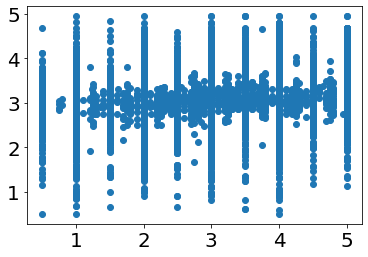

In [83]:
plt.scatter(targets, preds)

In [84]:
np.abs(targets-preds).mean()

0.8528564775001631